# **SOLUCIÓN DEL PROFESOR - NO PUBLICAR**

# Maestría en Inteligencia Artificial Aplicada

## Curso: Inteligencia Artificial y Aprendizaje Automático

### Tecnológico de Monterrey

### Prof Luis Eduardo Falcón Morales

## Adtividad de las Semanas 5 y 6
### **Problema de asignación de créditos: South German Dataset.**


## **Nombres y matrículas:**



## * Moises Flores Ortiz - A01795489
## * Lineth Del Carmen Guerra Camarena - A01795639



# **Parte I: Partición, análisis y pre-procesamiento de los datos.**

## **Ejercicio 1**

In [ ]:
# Aquí deberás incluir todas las librerías que requieras durante esta actividad:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import drive
import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, OrdinalEncoder
from sklearn.pipeline import Pipeline, FunctionTransformer
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.model_selection import cross_validate, RepeatedStratifiedKFold, GridSearchCV
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTEENN
from imblearn.under_sampling import RandomUnderSampler
from sklearn.inspection import permutation_importance
import imblearn.pipeline as imb_pipeline

In [ ]:
# Si se desean comentar algunos de los Warnings.
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Google Colab Mount
drive.mount('/content/drive')
DIR = "/content/drive/MyDrive/IA"
os.chdir(DIR)

Mounted at /content/drive


In [ ]:
# Carga y renombra los nombres de las columnas del alemán al inglés y desplegamos
# de nuevo el DataFrame para ver el resultado obtenido:

df = pd.read_csv("SouthGermanCredit.asc", sep=' ')
df.rename(columns={
    "laufkont": "status", "laufzeit": "duration", "moral": "credit_history",
    "verw": "purpose", "hoehe": "amount", "sparkont": "savings",
    "beszeit": "employment_duration", "rate": "installment_rate",
    "famges": "personal_status_sex", "buerge": "other_debtors",
    "wohnzeit": "present_residence", "verm": "property", "alter": "age",
    "weitkred": "other_installment_plans", "wohn": "housing",
    "bishkred": "number_credits", "beruf": "job", "pers": "people_liable",
    "telef": "telephone", "gastarb": "foreign_worker", "kredit": "credit_risk"
}, inplace=True)

df.head().T

,0,1,2,3,4
status,1,1,2,1,1
duration,18,9,12,12,12
credit_history,4,4,2,4,4
purpose,2,0,9,0,0
amount,1049,2799,841,2122,2171
savings,1,1,2,1,1
employment_duration,2,3,4,3,3
installment_rate,4,2,2,3,4
personal_status_sex,2,3,2,3,3
other_debtors,1,1,1,1,1


## **Ejercicio 2**

In [ ]:
# Los datos originales tienen en la variable de salida "credit_risk" a la clase negativa (buen cliente) con el valor de 1
# y a la clase de interés positiva (mal cliente) con el valor de 0. Realiza a continuación una transformación para que la
# clase negativa (buen cliente) quede ahora con el valor de 0 y la clase positiva (mal cliente) quede con el valor de 1.
df['credit_risk'] = df.apply(lambda row: 1 if row['credit_risk'] == 0 else 0, axis=1)
print(df['credit_risk'].value_counts())

credit_risk
0    700
1    300
Name: count, dtype: int64


## **Ejercicio 3**

In [ ]:
# Realiza una partición de 70-15-15 en entrenamiento, validación y prueba.
# Los nombres de los conjuntos deberán ser como se indican en los print de abajo:

# ************* Inlcuye aquí tu código:*****************************
X = df.drop('credit_risk', axis='columns')
y = df['credit_risk']

Xtrain, Xval, ytrain, yval = train_test_split(X, y, test_size=.30, stratify=y)
Xtest, Xval, ytest, yval = train_test_split(Xval, yval, test_size=.50, stratify=yval)
# *********** Aquí termina la sección de agregar código *************


# Mostremos las dimensiones de la partición generada:
print("Dimensiones:")
print("Entrenamiento:", Xtrain.shape, ytrain.shape)
print("Validación:", Xval.shape, yval.shape)
print("Prueba:", Xtest.shape, ytest.shape)

# Mostrar el porcentaje de cada clase de la variable de salida en el conjunto de entrenamiento
tmp = ytrain.sum()/ytrain.shape[0]
print("\nPorcentaje clases Positiva: %.2f%%, y Negativa: %.2f%%" % (100*(1-tmp), tmp*100))


Dimensiones:
Entrenamiento: (700, 20) (700,)
Validación: (150, 20) (150,)
Prueba: (150, 20) (150,)

Porcentaje clases Positiva: 70.00%, y Negativa: 30.00%


### **Con base al porcentaje de los niveles de la variable de salida ¿podemos decir que tenemos un problema de datos desbalanceado? ¿Por qué?**

Si bien la  proporción 70/30 es considerada viable en muchos foros de internet,  aun puede tener impacto en el desempeño de un modelo, pues dicho desbalanceo podría causar problemas de clasificación sobre la clase positiva. Los modelos de ML pueden tener problemas para generalizar la solución y por tanto presentar sobreajuste.



## **Ejercicio 4**

In [ ]:
#variables categóricas nominales y contar niveles
nominales = ['credit_history','purpose','personal_status_sex','other_debtors','other_installment_plans','housing']
variables_nominales = {}
for col in nominales:
    variables_nominales[col] = df[col].nunique()
cantidad_nominales = len(variables_nominales)

#varibles binarias
binarias = ['people_liable', 'telephone', 'foreign_worker','credit_risk']
variables_binarias = {}
for col in binarias:
  variables_binarias[col] = df[col].nunique()
cantidad_binarias = len(variables_binarias)

#variables ordinales cuantitativas
ordinales_cuantitativas = ['status', 'savings','employment_duration', 'property', 'job']
variables_ordinales_cuantitativas = {}
for col in ordinales_cuantitativas:
  variables_ordinales_cuantitativas[col] = df[col].nunique()
cantidad_ordinales_cuantitativas = len(variables_ordinales_cuantitativas)

#variables ordinales
ordinales = ['installment_rate','present_residence','number_credits']
variables_ordinales = {}
for col in ordinales:
  variables_ordinales[col] = df[col].nunique()
cantidad_ordinales = len(variables_ordinales)

#variables numéricas de valor entero
enteras =  ['duration', 'amount','age']
variables_enteras = {}
for col in enteras:
  variables_enteras[col] = df[col].nunique()
cantidad_enteras = len(variables_enteras)

print("Cantidad de variables categóricas nominales:", cantidad_nominales)
print("Cantidad de variables categóricas binarias:", cantidad_binarias)
print("Cantidad de variables odinales cuantitativas:", cantidad_ordinales_cuantitativas)
print("Cantidad de variables odinales:", cantidad_ordinales)
print("Cantidad de variables enteras:", cantidad_enteras)
#crear una lista para almacenar los resultados
resultados = []

#agregar variables categóricas nominales
for var, niveles in variables_nominales.items():
    resultados.append({'Variable': var, 'Tipo': 'Nominal', 'Niveles': niveles})
for var, niveles in variables_binarias.items():
    resultados.append({'Variable': var, 'Tipo': 'Binaria', 'Niveles': niveles})
for var, niveles in variables_ordinales_cuantitativas.items():
    resultados.append({'Variable': var, 'Tipo': 'Ordinales cuantitativas', 'Niveles': niveles})
for var, niveles in variables_ordinales.items():
    resultados.append({'Variable': var, 'Tipo': 'Ordinales', 'Niveles': niveles})
for var, niveles in variables_enteras.items():
    resultados.append({'Variable': var, 'Tipo': 'Entero', 'Niveles': niveles})
#convertir la lista de resultados en un DataFrame
resultados_df = pd.DataFrame(resultados)
print('\n')
#mostrar los resultados ordenados por tipo de variable
resultados_df = resultados_df.sort_values(by=['Tipo', 'Variable'])
print(resultados_df)

Cantidad de variables categóricas nominales: 6
Cantidad de variables categóricas binarias: 4
Cantidad de variables odinales cuantitativas: 5
Cantidad de variables odinales: 3
Cantidad de variables enteras: 3


                   Variable                     Tipo  Niveles
9               credit_risk                  Binaria        2
8            foreign_worker                  Binaria        2
6             people_liable                  Binaria        2
7                 telephone                  Binaria        2
20                      age                   Entero       53
19                   amount                   Entero      923
18                 duration                   Entero       33
0            credit_history                  Nominal        5
5                   housing                  Nominal        3
3             other_debtors                  Nominal        3
4   other_installment_plans                  Nominal        3
2       personal_status_sex                  N

### **Describe a continuación la información de cada variable: su descripción, el tipo de variable y para el caso de las categóricas, el total de niveles.**


### **6 Variables de entrada Categóricas Nominales:**

*   **credit_history (total de niveles):** Historial crediticio de los clientes segmentado en un total de 5 tipos o niveles.
*   **purpose (total de niveles):**  El propósito para el cual se emplean los creditos solicitados, esta variable tiene un total de 11 propositos distintos.
*   **personal_status_sex (total de niveles):** Es el estado civil del cliente, tiene un total de 4 estados distintos.
*   **other_debtors (total de niveles):** Describe si el cliente tiene un co-aplicante al credito o un aval (garante), tiene un total de 3 categorías.
*   **other_installment_plans (total de niveles):** Se refiere si el cliente tiene otros planes de pagos con otros bancos o tiendas. Cuenta con un total de 3 categorías.
*   **housing (total de niveles):** Indica el estado del cliente con relación a su casa: si es rentada, alquilada o la adquirió gratuitamente. Tiene 3 clases.


### **4 Variables Categóricas Binarias (3 de entrada y 1 de salida):**

*   **people_liable:** Son las categorías en 2 rangos del numero de personas financieramente responsables en el hogar del cliente.
*   **telephone:** Esta variable indica si el cliente tiene o no un  telefono registrado a su nombre.
*   **foreign_worker:** Esta variable establece si es o no trabajador extranjero.
*   **credit_risk:** (Variable de salida) Esta variable indica si la clasificación del riesgo crediticio del solicitante es buena o mala.


### **5 Variables Categóricas Ordinales (Cuantitativas Discretas + Strings):**

#### NOTA: Estas variables están formadas por niveles que contienen intervalos numéricos y de texto.


*   **status (total de niveles):**  Esta variable habla del estado de la cuenta corriente del cliente, tiene en total 4 niveles que indican la existencia o niveles de saldo de la cuenta.
*   **savings (total de niveles):** El nivel de ahorro del solicitante en la cuenta de ahorro, en total hay 5 niveles, que segmentan distintos niveles de ahorro o si el solicitante no tiene cuenta de ahorro.
*   **employment_duration (total de niveles):** El tiempo que ha estado empleado el cliente medido en años y segmentado en distintos rangos o si el cliente esta desempleado. En total esta variable cuenta con 5 niveles.
*   **property (total de niveles):** Indica si el solicitante cuenta con propiedades y el tipo de propiedad en caso de que tenga. Cuenta con 4 niveles.
*   **job (total de niveles):** Esta variable cuenta con 4 niveles en total, los cuales describen el tipo de empleo del solicitante.


### **3 Variables Categóricas Ordinales:**
### NOTA: Estas categóricas ordinales están formadas solo por intervalos numéricos.

*   **installment_rate (total de niveles):**  Esta variable indica la proporción que representan las cuotas que el cliente paga al mes respecto a sus ingresos. En total cuenta con 4 niveles.
*   **present_residence (total de niveles):** Esta variable establece el tiempo, segmentado en rangos, que el cliente ha estado viviendo en su residencia actual. En total tiene 4 niveles.
*   **number_credits (total de niveles):** Esta variable indica el numero de creditos que el cliente tiene, hay 4 niveles en total que establecen el rango de la cantidad de creditos.



### **3 Variables Numéricas reales o flotantes:**
*   **duration:** Este atributo o variable indica el numero de meses en que se espera que el cliente devuelva el préstamo.
*   **amount:** Esta variable indica el monto en unidades moentarias del credito que solicitó el cliente.
*   **age:** Edad del cliente medidada en años al moemnto de solicitar el credito.


## **Ejercicio 5**

### Análisis descriptivo de las variables usando el conjunto de entrenamiento.

### Incluye a continuación todo el código que consideres necesario para analizar las variables y decidir en dado caso qué transformaciones les estarías aplicando.

Hitogramas de variables numericas:

----------Statistics of Numerical Variables-------------


,duration,amount,age
count,700.000000,700.000000,700.000000
mean,20.714286,3292.088571,35.461429
std,12.089725,2858.819503,11.541550
min,4.000000,250.000000,19.000000
25%,12.000000,1343.250000,27.000000
50%,18.000000,2319.500000,33.000000
75%,24.000000,3981.750000,41.250000
max,72.000000,18424.000000,75.000000


--------------------------------------------------------


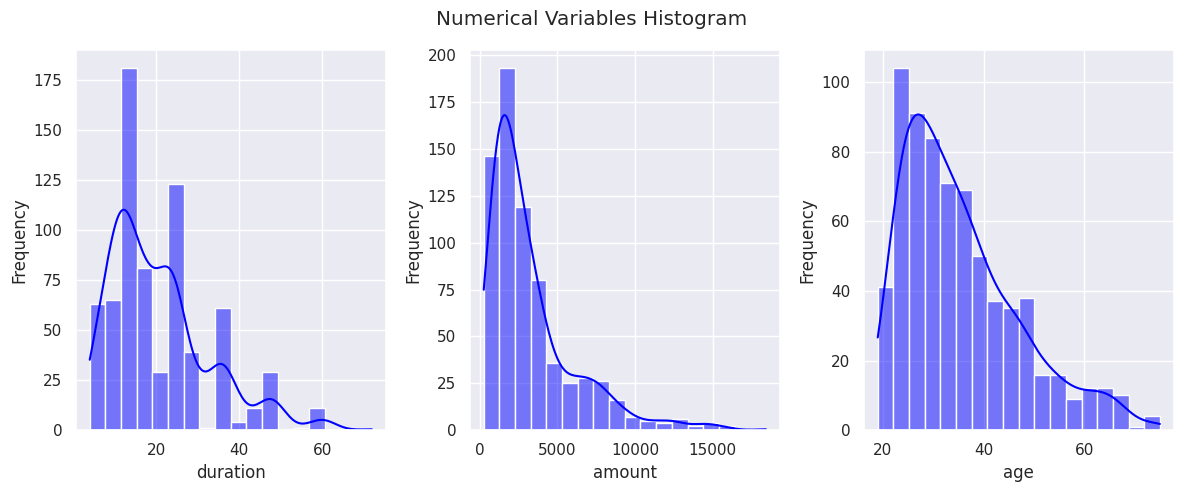

In [ ]:
numerical_variables_list = ["duration", "amount", "age"]

numerical_variables = Xtrain[numerical_variables_list]

print("----------Statistics of Numerical Variables-------------")
display(numerical_variables.describe())

print("--------------------------------------------------------")
sns.set(rc={'figure.figsize': (12,5)})
fig, axes = plt.subplots(1, 3)
for i in range(3):
          num_of_bins = 18 #int(np.log2(len(numerical_variables.iloc[:,i])))+1 #Sturges rule
          sns.histplot(numerical_variables.iloc[:, i], bins=num_of_bins, kde=True, color="blue", ax=axes[i])
          axes[i].set_xlabel(numerical_variables.columns[i])
          axes[i].set_ylabel("Frequency")

plt.tight_layout()
fig.suptitle("Numerical Variables Histogram")
plt.subplots_adjust(top=0.9)
plt.show();


### **Describe y explica a continuación las transformaciones que has decidido aplicar a cada columna:**

Al observar las columnas numéricas duration, amount y age tienen un sesgo positivo, es decir la cola de la derecha de la distribución es más larga, de acuerdo con la teoría esto puede solucionarse con la aplicación de logaritmo. En cuanto a las categoricas nominales, se aplicará one hot encoder, de acuerdo con las instrucciones, para generar las categorías en terminos binarios.


# **Parte II: Modelos de aprendizaje automático con los conjuntos originales de la partición realizada.**

## **Ejercicio 6**

In [ ]:
# Transformaciones que se aplicarán a las variables numéricas usando la clase Pipeline de sklearn:

# Variables numéricas:
num_pipe = Pipeline([('num_cols_transform',
                      FunctionTransformer(lambda x: np.log(x)))])
num_pipe_nombres = ["duration", "amount", "age"]



# Variables categóricas-Nominales:
cat_pipe = Pipeline([('catohe', OneHotEncoder(drop='first'))])
cat_pipe_nombres = ["credit_history", "purpose", "personal_status_sex",
                    "other_debtors", "other_installment_plans", "housing",
                    "people_liable", "telephone", "foreign_worker"]


# Conjuntemos las transformaciones de todo tipo de variable y
# dejamos sin procesar aquellas que hayas decidido no transformar:

columnasTransformer = ColumnTransformer([
    ("num_cols_transform", num_pipe, num_pipe_nombres),
    ("cat_cols_transform", cat_pipe, cat_pipe_nombres)
], remainder='passthrough')

## **Ejercicio 7**

In [ ]:
# Como se va a utilizar Validación-Cruzada, concatena los conjuntos de entrenamiento y validación
# en uno nuevo conjunto aumentado que llamaremos trainval para utilizar como entrenamiento:

Xtrainval = pd.concat([Xtrain, Xval], axis=0)
ytrainval = pd.concat([ytrain, yval], axis=0)

# Veamos cuántas varaibles nuevas se introducen con las transformaciones One-Hot-Encoding:
Xtmp = Xtrainval.copy()
tmp = columnasTransformer.fit_transform(Xtmp)
print("Dimensión de las variables de entrada ANTES de las transformaciones:", Xtmp.shape)
print("Dimensión de las variables de entrada DESPUÉS de las transformaciones:", tmp.shape)

Dimensión de las variables de entrada ANTES de las transformaciones: (850, 20)
Dimensión de las variables de entrada DESPUÉS de las transformaciones: (850, 36)


## **Ejercicio 8**

In [ ]:
# Definimos a continuación la función que llamamos "mis_modelos" que incluye
# todos los modelos que deseamos comparar en el ejercicio.


def mis_modelos():
  modelos, nombres = list(), list()


  # ************* Inlcuye aquí tu código:**************************
  #
  # Deberás incluir en cada modelo los argumentos que consideres
  # adecuados para que cada uno converja y no esté sobreentrenado
  # con respecto a la métrica de la exatitud (accuracy).


  # Regresión Logística - Logistic Regression-LR:
  # https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

  modelos.append(LogisticRegression())
  nombres.append('LR')




  # k-Vecinos más Cercanos : k-Nearest-Neighbors-kNN:
  # https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html

  modelos.append(KNeighborsClassifier())
  nombres.append('kNN')




  # Árbol de decisiones-DecisionTree-DT:
  # https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

  modelos.append(DecisionTreeClassifier())
  nombres.append('DTree')




  # Bosque Aleatorio-RandomForest-RF:
  # https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

  modelos.append(RandomForestClassifier())
  nombres.append('RF')




  # XGBoosting:
  # https://xgboost.readthedocs.io/en/latest/python/python_api.html#xgboost.XGBClassifier
  # https://xgboost.readthedocs.io/en/stable/parameter.html

  modelos.append(XGBClassifier())
  nombres.append('XGBoost')




  # Red neuronal de Perceptrón Multicapa-MLP:
  # https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html

  modelos.append(MLPClassifier())
  nombres.append('MLP')




  # Máquina de Vectores de Soporte-SVM:
  # https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html

  modelos.append(SVC())
  nombres.append('SVM')

  return modelos, nombres




# Entrenamos cada uno de los modelos y desplegamos la métricas de Train y Val.

# NOTA: Observa que el método de Validación-Cruzada llama  a los resultados
#       de "validation" como "test":

modelos, nombres = mis_modelos()
resultados = list()



model_hiper_params = {"LR": {'C': list(range(1, 3)), 'max_iter': [100, 1000, 2000],
             'solver': ['lbfgs', 'liblinear', 'newton-cg',
                        'newton-cholesky', 'sag', 'saga']},

    "kNN": {'n_neighbors': list(range(1, 12)),
             'weights': ['uniform', 'distance'],
             'metric': ['euclidean', 'manhattan', 'minkowski', 'chebyshev']},

    "DTree": { 'criterion': ['gini', 'entropy', 'log_loss'],
               'splitter': ['best', 'random'], 'max_depth': [None, 10, 20, 30],
               'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4],
               'max_features': [None, 'sqrt', 'log2'] },

    "RF": { 'n_estimators': [50, 100], 'criterion': ['gini', 'entropy'],
            'max_depth': [None, 20], 'min_samples_split': [5, 10],
            'min_samples_leaf': [1, 4],
            'max_features': ['auto', 'sqrt', 'log2'] },

    "XGBoost": {'n_estimators': [50, 100, 200], 'max_depth': [3, 5, 7],
                'learning_rate': [0.01, 0.1, 0.3], 'subsample': [0.8, 1.0],
                'colsample_bytree': [0.8, 1.0], 'gamma': [0, 0.1, 0.3] },


    "MLP": {'hidden_layer_sizes': [(100,), (50, 100, 50)], 'solver': ['adam'],
            'activation': ['relu', 'tanh'], 'alpha': [0.0001, 0.05],
            'learning_rate': ['constant', 'adaptive']},


    "SVM": { 'kernel': ['rbf'],
             'gamma': ['scale'] }}

modelo_best_params = {}

for num,model in enumerate(modelos):
  _modelo = GridSearchCV(model, param_grid= model_hiper_params[nombres[num]], cv=5)
  _modelo.fit(Xtrainval, ytrainval)
  modelo_best_params[nombres[num]] = _modelo.best_params_
  print("Los mejores hiperparámetros para el modelo %s son %s con un score de %0.4f" % (nombres[num], _modelo.best_params_, _modelo.best_score_))



Los mejores hiperparámetros para el modelo LR son {'C': 1, 'max_iter': 1000, 'solver': 'lbfgs'} con un score de 0.7635
Los mejores hiperparámetros para el modelo kNN son {'metric': 'chebyshev', 'n_neighbors': 10, 'weights': 'uniform'} con un score de 0.6988
Los mejores hiperparámetros para el modelo DTree son {'criterion': 'log_loss', 'max_depth': 30, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 10, 'splitter': 'random'} con un score de 0.7341
Los mejores hiperparámetros para el modelo RF son {'criterion': 'entropy', 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 100} con un score de 0.7753
Los mejores hiperparámetros para el modelo XGBoost son {'colsample_bytree': 0.8, 'gamma': 0.3, 'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 50, 'subsample': 0.8} con un score de 0.7718
Los mejores hiperparámetros para el modelo MLP son {'activation': 'tanh', 'alpha': 0.05, 'hidden_layer_sizes': (50, 100, 50),

In [ ]:
for i in range(len(modelos)):


  # Definimos nuestro pipeline con las transformaciones y los modelos:
  pipeline = Pipeline(steps=[('ct',columnasTransformer),
            ('m',modelos[i].set_params(**modelo_best_params[nombres[i]]))])

  # Aplicaremos validación-cruzada:
  micv = RepeatedStratifiedKFold(n_splits=5,
                                 n_repeats=3,
                                 random_state=5     # agreguemos una semilla para estabilizar resultados.
                                 )


  # Definimos las métricas que desamos recuperar:
  mismetricas = {'accuracy','precision','recall','f1'}

  # Llevamos a cabo el entrenamiento:
  scores = cross_validate(pipeline,
                          Xtrainval,
                          ytrainval,
                          scoring=mismetricas,
                          cv=micv,
                          return_train_score=True,
                          )

  # Guardemos el resultado de cada modelo para análisis posteriores.
  resultados.append(scores)

  # Desplegamos los valores de las métricas para verificar si no hay
  # subentrenamiento o sobreentrenamiento:
  print('>> %s' % nombres[i])
  for j,k in enumerate(list(scores.keys())):
    if j>1:
      print('\t %s %.3f (%.3f)' % (k, np.mean(scores[k]),np.std(scores[k])))

>> LR
	 test_accuracy 0.762 (0.022)
	 train_accuracy 0.785 (0.007)
	 test_f1 0.555 (0.050)
	 train_f1 0.598 (0.015)
	 test_recall 0.499 (0.066)
	 train_recall 0.533 (0.017)
	 test_precision 0.634 (0.050)
	 train_precision 0.680 (0.015)
>> kNN
	 test_accuracy 0.731 (0.020)
	 train_accuracy 0.762 (0.010)
	 test_f1 0.321 (0.104)
	 train_f1 0.408 (0.042)
	 test_recall 0.221 (0.090)
	 train_recall 0.275 (0.036)
	 test_precision 0.649 (0.114)
	 train_precision 0.803 (0.031)
>> DTree
	 test_accuracy 0.700 (0.024)
	 train_accuracy 0.791 (0.015)
	 test_f1 0.410 (0.077)
	 train_f1 0.596 (0.041)
	 test_recall 0.357 (0.106)
	 train_recall 0.517 (0.054)
	 test_precision 0.503 (0.065)
	 train_precision 0.707 (0.024)
>> RF
	 test_accuracy 0.756 (0.016)
	 train_accuracy 0.890 (0.008)
	 test_f1 0.450 (0.065)
	 train_f1 0.783 (0.018)
	 test_recall 0.339 (0.072)
	 train_recall 0.661 (0.024)
	 test_precision 0.699 (0.067)
	 train_precision 0.961 (0.015)
>> XGBoost
	 test_accuracy 0.762 (0.026)
	 train_acc

De acuerdo con las metricas observadas, en particular, al comparar la metrica accuracy entre los conjuntos de validación y prueba, se puede observar que los modelos presentan sobre-entrenamiento a exepción de `LogisticRegression` y `SVM` donde la diferencia de las metricas esta alrededor del 3%. Por otra parte, todos los modelos presentan un accuracy mayor al 70% tanto en entrenamiento como en prueba, por lo que si bien hay margen de mejora, podemos considerar que no hay un sub-entrenamiento importante.

## **Ejercicio 9**

### **De acuerdo a la información de la matriz de costo dada en la documentación del problema, contesta las siguientes preguntas:**

**a.   ¿Qué error se considera más costoso por parte del banco? ¿FP o FN? Justifica tu respuesta.**

De acuerdo con la documentación del dataset y la matriz de costo, el banco considera que es peor clasificar a un cliente como bueno cuando en realidad es malo. Esto implica que el banco quiere diminuir a aquellos clientes que el modelo predice como buen cliente (clase negativa), cuando en realidad es un mal cliente (clase positiva).

En general, en un modelo de predicción de riesgo crediticio, disminuir los falsos positivos pretende disminuir el costo de oportunidad para el banco, es decir, predecir de mejor manera los buenos clientes para poder otorgar más créditos y obetner mayores ingresos, con ello asumiendo un mayor riesgo. Por otra parte, disminuir los falsos negativos implica reducir aquellos clientes que fueron predecidos como buenos clientes (clase negativa) cuando en realidad eran malos clientes (clase positiva) y esto representa una postura conservadora del banco, pues pretende reducir riesgos relacionados a que los clientes no paguen. En este caso el banco le da mayor peso a identificar de mejor manera a la clase positiva.


**b.   ¿Cuál o cuáles serían entonces las métricas a considerar como más importantes? Justifica tu respuesta.**

La metrica más importante sería recall (sensibilidad), pues mide la proporción de casos clasificados en la clase negativa, cuando en realidad pertenecen a la clase positiva, es decir, casos predichos como buenos clientes cuando en realidad eran malos. Así mismo, se debe tomar en cuenta el accuracy del modelo para observar que no haya sobre-entrenamiento y el f1-score para tener en cuenta el balance entre falsos positivos y negativos, pues no se deben descuidar tampoco los falsos negativos ya que representan el costo de oportunidad del negocio del crédito.

## **Ejercicio 10**

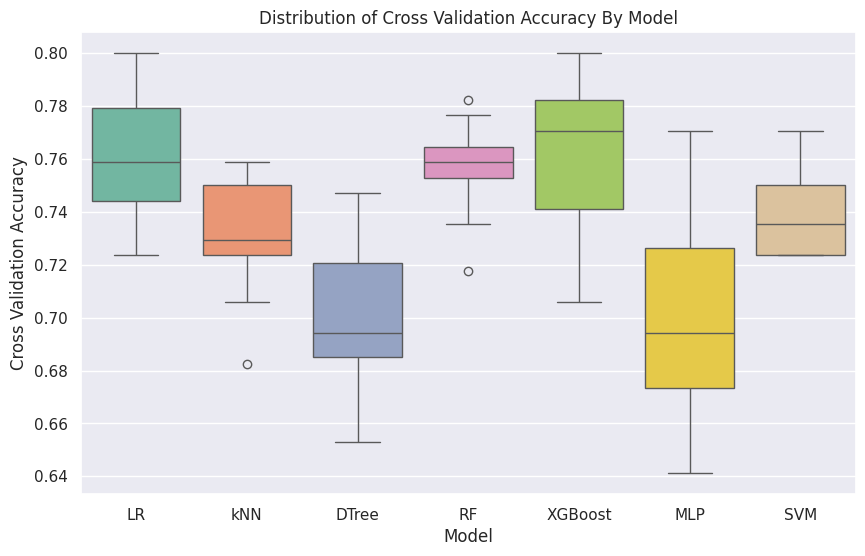

In [ ]:
# Obtener un diagrama de caja y bigotes (boxplot) múltiple de todos los modelos,
# utilizando los resultados obtenidos con la métrica que consideraste más importante
# en el ejercicio anterior:

test_accuracy_mestric = {}
for nombre, resultado in zip(nombres,resultados):
  test_accuracy_mestric[nombre] = resultado['test_accuracy']


plt.figure(figsize=(10,6))
sns.boxplot( palette='Set2', data=pd.DataFrame(test_accuracy_mestric))
plt.title('Distribution of Cross Validation Accuracy By Model')
plt.xlabel('Model')
plt.ylabel('Cross Validation Accuracy')
plt.show()

### **Incluye tus conclusiones al respecto, en particular indica cuáles consideras son los mejores modelos obtenidos.**

Si observamos la metrica accuracy (como viene en las indicaciones del pdf de la actividad) de cada uno de los modelos, podemos considerar que los mejores modelos son `RandomForest`, `XGBoost` y `LogisticRegression`, en primer lugar porque sus rangos intercuartiles superan el 0.75, pero también porque sus medianas son más altas que en `KNN` y `SVM` que también cumplen con dicho criterio. De estos 3 modelos podríamos considerar mejor a `LogisticRegression` y `RandomForest` porque presentan una distribución más compacta de su accuracy respecto a `XGBoost`. Sin embargo, es importante tomar en cuenta que algunos de los modelos están sobre-entrenados; en este caso solo `LogisticRegression` presenta una diferencia en accuracy entre entrenamiento y prueba de alrededor de 3%.




# **Parte III: Modelos con técnicas para clases no balanceadas.**

## **Ejercicio 11**

In [ ]:
# Selecciona una técnica de sobremuestreo y/o submuestreo
# para clases no balanceadas que consideres adecuada.
msmote = SMOTE(random_state=23)
resultados_sampl_1 = list()
print('---------RESULTADOS USANDO SMOTE-----------')
for i in range(len(modelos)):


  # Definimos nuestro pipeline con las transformaciones y los modelos:
  pipeline_sampl_1 = imb_pipeline.Pipeline(steps=[('ct',columnasTransformer),
                                          ('smote',msmote),
            ('m',modelos[i].set_params(**modelo_best_params[nombres[i]]))])

  # Aplicaremos validación-cruzada:
  micv = RepeatedStratifiedKFold(n_splits=5,
                                 n_repeats=3,
                                 random_state=5     # agreguemos una semilla para estabilizar resultados.
                                 )


  # Definimos las métricas que desamos recuperar:
  mismetricas = {'accuracy','precision','recall','f1'}

  # Llevamos a cabo el entrenamiento:
  scores_sampl_1 = cross_validate(pipeline_sampl_1,
                          Xtrainval,
                          ytrainval,
                          scoring=mismetricas,
                          cv=micv,
                          return_train_score=True,
                          )

  # Guardemos el resultado de cada modelo para análisis posteriores.
  resultados_sampl_1.append(scores_sampl_1)

  # Desplegamos los valores de las métricas para verificar si no hay
  # subentrenamiento o sobreentrenamiento:

  print('>> %s' % nombres[i])
  for j,k in enumerate(list(scores_sampl_1.keys())):
    if j>1:
      print('\t %s %.3f (%.3f)' % (k, np.mean(scores_sampl_1[k]),np.std(scores_sampl_1[k])))

#------------------------------------------------------------------------------#

smoteenn = SMOTEENN(sampling_strategy=1.0, random_state=23)
resultados_sampl_2 = list()

print('----------------------RESULTADOS USANDO SMOTEENN------------------------')

for i in range(len(modelos)):


  # Definimos nuestro pipeline con las transformaciones y los modelos:
  pipeline_sampl_2 = imb_pipeline.Pipeline(steps=[('ct',columnasTransformer),
                                          ('smoteenn',smoteenn),
            ('m',modelos[i].set_params(**modelo_best_params[nombres[i]]))])

  # Aplicaremos validación-cruzada:
  micv = RepeatedStratifiedKFold(n_splits=5,
                                 n_repeats=3,
                                 random_state=5     # agreguemos una semilla para estabilizar resultados.
                                 )


  # Definimos las métricas que desamos recuperar:
  mismetricas = {'accuracy','precision','recall','f1'}

  # Llevamos a cabo el entrenamiento:
  scores_sampl_2 = cross_validate(pipeline_sampl_2,
                          Xtrainval,
                          ytrainval,
                          scoring=mismetricas,
                          cv=micv,
                          return_train_score=True,
                          )

  # Guardemos el resultado de cada modelo para análisis posteriores.
  resultados_sampl_2.append(scores_sampl_2)

  # Desplegamos los valores de las métricas para verificar si no hay
  # subentrenamiento o sobreentrenamiento:

  print('>> %s' % nombres[i])
  for j,k in enumerate(list(scores_sampl_2.keys())):
    if j>1:
      print('\t %s %.3f (%.3f)' % (k, np.mean(scores_sampl_2[k]),np.std(scores_sampl_2[k])))

---------RESULTADOS USANDO SMOTE-----------
>> LR
	 test_accuracy 0.725 (0.022)
	 train_accuracy 0.757 (0.009)
	 test_f1 0.600 (0.039)
	 train_f1 0.646 (0.011)
	 test_recall 0.690 (0.076)
	 train_recall 0.741 (0.013)
	 test_precision 0.534 (0.029)
	 train_precision 0.573 (0.013)
>> kNN
	 test_accuracy 0.716 (0.025)
	 train_accuracy 0.830 (0.006)
	 test_f1 0.390 (0.088)
	 train_f1 0.678 (0.016)
	 test_recall 0.311 (0.096)
	 train_recall 0.600 (0.028)
	 test_precision 0.547 (0.093)
	 train_precision 0.782 (0.017)
>> DTree
	 test_accuracy 0.661 (0.032)
	 train_accuracy 0.792 (0.012)
	 test_f1 0.467 (0.048)
	 train_f1 0.666 (0.019)
	 test_recall 0.497 (0.071)
	 train_recall 0.690 (0.041)
	 test_precision 0.444 (0.048)
	 train_precision 0.645 (0.024)
>> RF
	 test_accuracy 0.751 (0.020)
	 train_accuracy 0.923 (0.007)
	 test_f1 0.561 (0.048)
	 train_f1 0.864 (0.012)
	 test_recall 0.537 (0.087)
	 train_recall 0.819 (0.019)
	 test_precision 0.599 (0.050)
	 train_precision 0.914 (0.011)
>> XGBoo

## **Ejercicio 12**

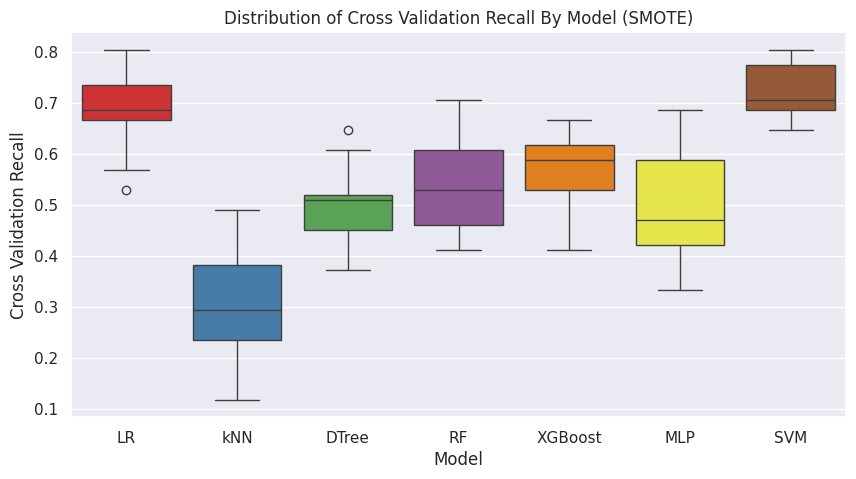

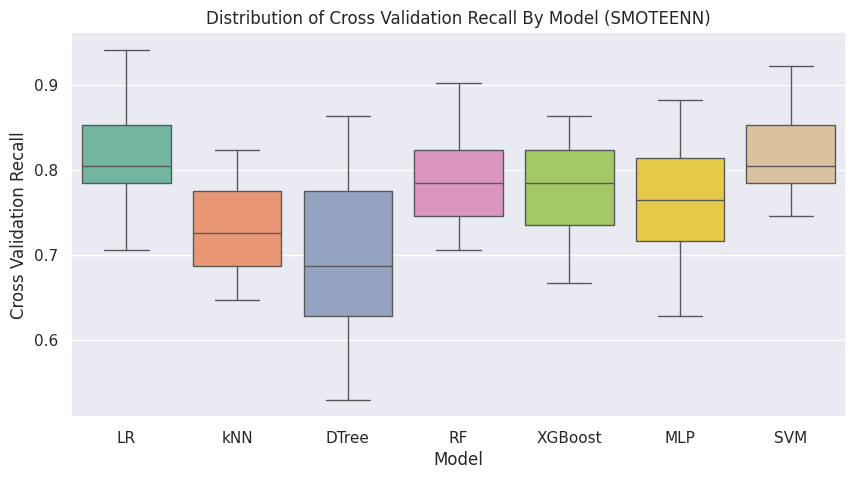

In [ ]:
# Obtener un diagrama de caja y bigotes (boxplot) múltiple de todos los modelos,
# que incluye submuestreo y/o sobremuestreo:

test_recall_mestric_sampl_1 = {}
for nombre, resultado in zip(nombres,resultados_sampl_1):
    test_recall_mestric_sampl_1[nombre] = resultado['test_recall']


plt.figure(figsize=(10,5))
sns.boxplot( palette='Set1', data=pd.DataFrame(test_recall_mestric_sampl_1))
plt.title('Distribution of Cross Validation Recall By Model (SMOTE)')
plt.xlabel('Model')
plt.ylabel('Cross Validation Recall')
plt.show()
#------------------------------------------------------------------------------#
test_recall_mestric_sampl_2 = {}
for nombre, resultado in zip(nombres,resultados_sampl_2):
    test_recall_mestric_sampl_2[nombre] = resultado['test_recall']


plt.figure(figsize=(10,5))
sns.boxplot( palette='Set2', data=pd.DataFrame(test_recall_mestric_sampl_2))
plt.title('Distribution of Cross Validation Recall By Model (SMOTEENN)')
plt.xlabel('Model')
plt.ylabel('Cross Validation Recall')
plt.show()

# **Parte IV: Mejor modelo**

## **Ejercicio 13**

### **Selecciona y justifica cuál consideras es el mejor modelo que has obtenido hasta ahora.**

Hasta ahora el mejor modelo ha sido `LogisticRegression` con la técnica de submuestro y sobremuestreo `SMOTEENN` tomando en cuenta la metrica recall, la cual fue justificada en el ejercicio 9, ya que la distribución de la metrica recall presenta de las medianas más altas (alrededor del 77%) en el conjunto de prueba respecto a todos los modelos. Así mismo, el modelo no presenta sobre-entrenamiento ya que la diferencia en accuracy entre el conjunto de entrenamiento y prueba esta alrededor del 3%. Si bien, el accuracy en general se vio impactado al bajar de un promedio de 75% a 66%, la metrica recall aumento más de 25%, respecto a la metrica del modelo inicial.



## **Ejercicio 14**

In [ ]:
# Incluye aquí tu mejor modelo. Verifica que tu modelo no esté sobreentrenado
# e indica cuáles son los mejores valores obtenidos de los hiperparámetros.
# Con el mejor modelo y los mejores hiperparámetros encontrados en el ejercicio anterior,
# utiliza ahora (por primera vez en la actividad) el conjunto de prueba (test set) para:

# a.	Mejor modelo con los mejores hiperparámetros y el conjunto de prueba.

print("Volvemos a calculas los mejores hiperparámetros para este modelo, ahora ya con la técnica SMOTEENN...")

LGR = modelos[0]
smoteenn = SMOTEENN(sampling_strategy=1.0, random_state=23)
pipeline_lgr = imb_pipeline.Pipeline(steps=[
    ('ct', columnasTransformer), ('under-oversampling', smoteenn)
])

Xtrainval_lgr,ytrainval_lgr = pipeline_lgr.fit_resample(Xtrainval, np.ravel(ytrainval))

dicc_grid = {'C': list(range(1, 12)),
             'max_iter': [100, 1000, 2000],
             'solver': ['lbfgs', 'liblinear', 'newton-cg',
                        'newton-cholesky', 'sag', 'saga']}

modelo_LGR = GridSearchCV(LGR, param_grid=dicc_grid)

modelo_LGR.fit(Xtrainval_lgr, ytrainval_lgr)

print("Los mejores hiperparámetros son %s con un score de %0.4f" % (modelo_LGR.best_params_, modelo_LGR.best_score_))


pipeline_final = imb_pipeline.Pipeline(steps=[('ct',columnasTransformer),
                                      ('smoteenn',smoteenn),('m',modelos[0].set_params(**modelo_LGR.best_params_))])


pipeline_final.fit(Xtrainval, ytrainval)

print("---------------------------------------------------------------")
print("FINAL MODEL ACCURACY METRICS")
print("---------------------------------------------------------------")
print('accuracy-train-balanced', pipeline_final.score(Xtrainval, ytrainval))
print('accuracy-test-balanced', pipeline_final.score(Xtest, ytest))

y_pred_train = pipeline_final.predict(Xtrainval)

y_pred_test = pipeline_final.predict(Xtest)

Volvemos a calculas los mejores hiperparámetros para este modelo, ahora ya con la técnica SMOTEENN...
Los mejores hiperparámetros son {'C': 5, 'max_iter': 100, 'solver': 'liblinear'} con un score de 0.8906
---------------------------------------------------------------
FINAL MODEL ACCURACY METRICS
---------------------------------------------------------------
accuracy-train-balanced 0.6941176470588235
accuracy-test-balanced 0.62


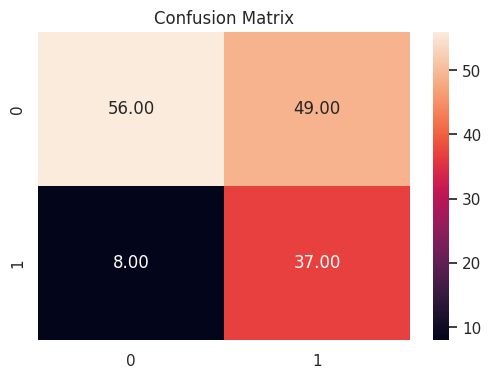

              precision    recall  f1-score   support

           0       0.88      0.53      0.66       105
           1       0.43      0.82      0.56        45

    accuracy                           0.62       150
   macro avg       0.65      0.68      0.61       150
weighted avg       0.74      0.62      0.63       150



In [ ]:
# b.	Obtener la matriz de confusión y el classification_report().
plt.figure(figsize=(6,4))
cm = metrics.confusion_matrix(ytest, y_pred_test)
plt.title('Confusion Matrix')
sns.heatmap(cm, annot=True, fmt= ".2f", xticklabels=[0, 1], yticklabels=[0, 1])
plt.show()
print(metrics.classification_report(ytest, y_pred_test))

Feature: 0, Score: 0.10824
Feature: 1, Score: 0.00784
Feature: 2, Score: -0.00627
Feature: 3, Score: 0.01725
Feature: 4, Score: 0.00863
Feature: 5, Score: 0.01020
Feature: 6, Score: 0.02118
Feature: 7, Score: -0.00157
Feature: 8, Score: 0.00235
Feature: 9, Score: 0.00471
Feature: 10, Score: 0.00863
Feature: 11, Score: 0.00235
Feature: 12, Score: 0.00784
Feature: 13, Score: 0.00706
Feature: 14, Score: 0.00549
Feature: 15, Score: -0.00471
Feature: 16, Score: 0.00157
Feature: 17, Score: 0.00471
Feature: 18, Score: 0.00471
Feature: 19, Score: 0.00235


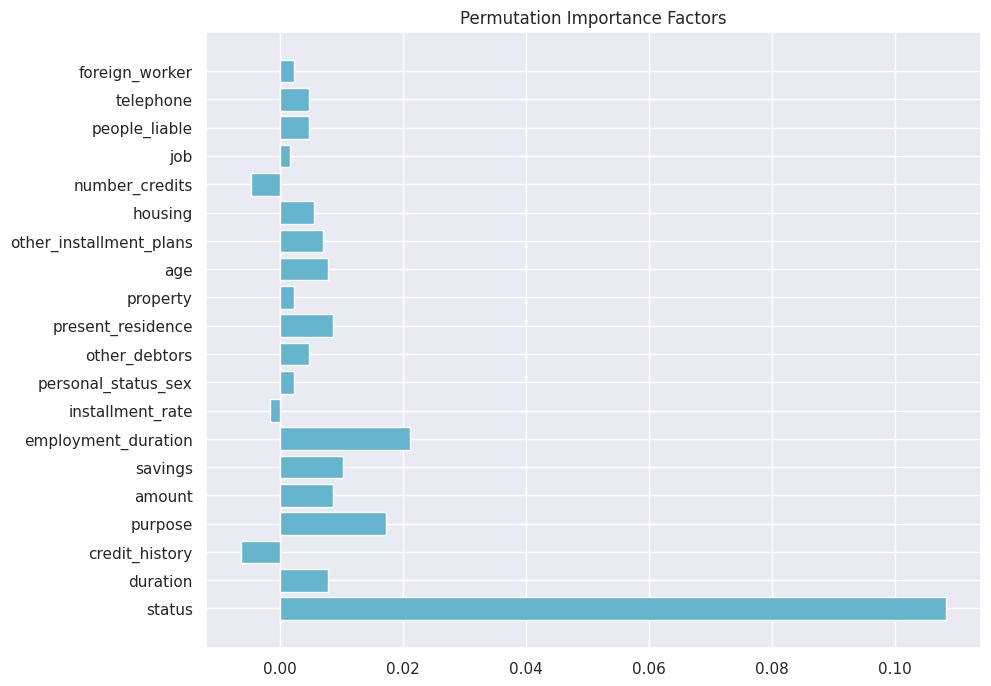

In [ ]:
# c.	Realiza un análisis de importancia de variables (feature importance) de este
#     mejor modelo e incluye tus conclusiones al respecto.
results = permutation_importance(pipeline_final, Xtrainval, ytrainval, scoring='recall')
importance = results.importances_mean

for i,v in enumerate(importance):
 print('Feature: %0d, Score: %.5f' % (i,v))
plt.figure(figsize=(10,8))
plt.title("Permutation Importance Factors")
plt.barh([pd.DataFrame(Xtrainval).columns[x] for x in range(len(importance))], importance, color='c')
plt.show()

Los factores más importantes que ponderan para la decisión de buenos o malos clientes en cuanto al riesgo crediticio resultan ser en primer lugar **status** el cual indica la existencia de una cuenta corriente y sus diferente niveles de monto y en un segundo lugar o lugares, se encuentras **savings** (niveles de ahorro), **purpose** (propósito del crédito), **duration** (duración  del crédito) y **credit_history** (tipo de historial crediticio). Todas estás variables tienen lógica y están fuertemente relacionadas con la decisión de otorgar o no un crédito a los solicitantes, por lo que resultan ser factores a tomar en cuenta a la hora de aprobar a un cliente para saber si es buen o malo respecto al riesgo crediticio.

## **Ejercicio 15**

### **Escribe tus conclusiones finales de la actividad.**

Los modelos de AI/ML para determinar el riesgo crediticio se han vuelto cada vez más importantes en la industria por su impacto en la optimización de procesos, la administración del riesgo y la oportunidad de más ingresos. En esta actividad se exploraron diversos modelos de clasificación de buenos y malos clientes respecto al riesgo crediticio y el mejor modelo resultó ser el de regresión logistica en combinación con la tecnica de sobre-muetreo SMOTE y sub-muestro ENN y la optimización de hiperparámetros.

Si bien, el modelo resultó no presentar sobre-entrenamiento ya que la diferencia entre el accuracy de los conjuntos de entrenamiento y prueba resultó estar alrededor de 3%, si se vio impactada la magnitud de la metrica pues su performance siempre se encuentre alrededor del 70% para ambos conjuntos. Esto se debio a que se premió la metrica recall, pues el objetivo general, como se estableció en el ejercicio 9, es reducir los falsos negativos debido a que tienen un impacto en el riesgo crediticio para un banco.

Sin embargo, es necesario tomar en cuenta que no siempre la metrica recall se precisa en este tipo de modelos, pues a veces se puede buscar ponderar más la prceisión si el banco adopta una estrategia crediticia más arriesgada para aumentar sus ingresos.

Finalmente, en cuanto al modelo, se afectaron otras métricas al aumentar el recall para la clase positiva y se logró aumentar al 25% respecto al modelo inicial. Aun así es importante mencionar que un accuracy del 70% está apenas en el limite inferior del Baseline Model presentado en la documentación oficial, por lo que aun hay margen de probar e iterar con distintas transformaciones de datos o modelos de clasificación para intentar adquirir mejores metricas. En terminos del ejercicio, se puede considerar que se logro un modelo al menos funcional ya que esta dentro del rango de performance del Baseline Model aumentando el recall que era la metrica objetivo.



>> ### **Fin de la Actividad de las Semanas 5 y 6.**